<a href="https://colab.research.google.com/github/MudSnail/Land_Cover_Classification/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import base libraries
import pandas as pd
import numpy as np
import copy
import pickle
import cloudpickle
from scipy.stats import zscore

#Sklearn - Pipelines, Training
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

#Classification Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#misc
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Input Data, Combine and Subsample

In [4]:
#Read in CSVs
james_bay = pd.read_csv('/content/drive/MyDrive/AISC/james_bay_data.csv')
labrador = pd.read_csv('/content/drive/MyDrive/AISC/labrador_data.csv')
simcoe = pd.read_csv('/content/drive/MyDrive/AISC/simcoe_york_data.csv')

In [6]:
#List dataframes to add to james_bay
dfs = [labrador, simcoe]

#Merged data
merged_data = james_bay.append(dfs)

#Print shape and check new data
print(merged_data.shape)
merged_data.head()

(8917500, 13)


,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0055,0.0017,0.0009,0.0016,0.0026,0.0056,0.0001,0.0009,0.0003,0.0032,0.0012,0.0114,0
1,0.0054,0.0020,0.0009,0.0017,0.0021,0.0060,0.0001,0.0005,0.0007,0.0028,0.0014,0.0115,0
2,0.0058,0.0018,0.0007,0.0016,0.0028,0.0060,0.0001,0.0008,0.0007,0.0030,0.0012,0.0124,0
3,0.0057,0.0016,0.0007,0.0016,0.0023,0.0058,0.0001,0.0012,0.0006,0.0031,0.0011,0.0119,0
4,0.0066,0.0013,0.0008,0.0020,0.0029,0.0059,0.0001,0.0008,0.0005,0.0030,0.0014,0.0115,0


In [7]:
#Drop Class = 0 (null values, which equate to 18)
merged_data = merged_data[merged_data.Class != 0]

#Double check value counts
merged_data.Class.value_counts()

15    2836714
18    1050988
1      677877
5      666952
16     646870
13     612009
8      575175
17     512930
12     415493
6      378274
2      151560
11     135890
14      94850
10      86338
19      74619
Name: Class, dtype: int64

In [19]:
#SubSample ~70 000 for each class
sample = merged_data.groupby('Class').apply(lambda x: x.sample(n=70000)).reset_index(drop=True)
sample.head(4)

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0187,0.1172,0.0938,0.1268,0.0704,0.0455,0.1119,0.0518,0.1400,0.0371,0.1411,0.0291,1
1,0.0158,0.1394,0.1361,0.1644,0.0727,0.0339,0.1962,0.0736,0.1905,0.0316,0.1778,0.0197,1
2,0.0545,0.1787,0.2344,0.1872,0.1507,0.1294,0.2325,0.1900,0.1988,0.1412,0.1995,0.1080,1
3,0.0188,0.1556,0.1309,0.1777,0.0857,0.0401,0.1954,0.0699,0.1964,0.0369,0.1864,0.0250,1


# EDA - Checking Each Layer per Class

In [9]:
def plot_class_distributions(x, y, z):
  """
  Input:
  x - the specific NRCAN Land Classification
  y - the plot's 1st x lim
  z - the plot's 2nd x lim

  Output: Skewness distribution plots per each layer for the class specified
  """
  #Select Class and drop column
  selected_class = sample.loc[sample['Class'] == x]
  selected_class = sample.drop('Class', axis = 1)

  #exctract column values, identify number of columns and rows
  l = selected_class.columns.values 
  number_of_columns=12
  number_of_rows = len(l)-1/number_of_columns

  #plot distribution skewness figure for each column
  plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
  for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(selected_class[l[i]],kde=True)
    #Set x axis limits
    plt.xlim([y,z]) 

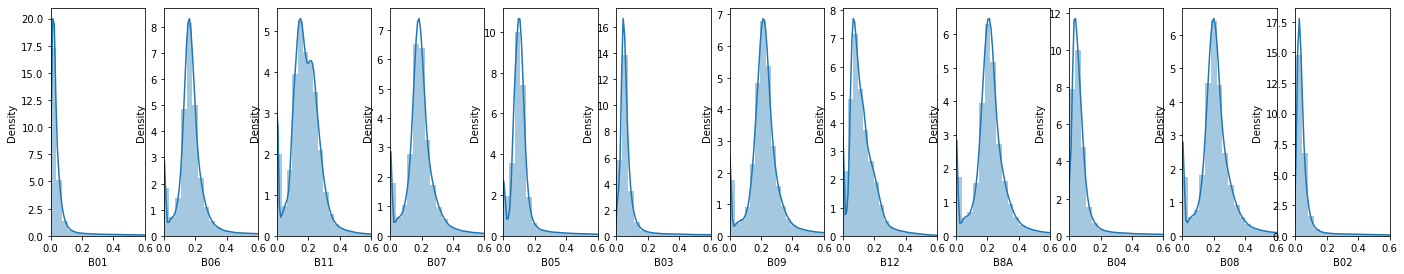

In [10]:
#Check skewness of Class 1
plot_class_distributions(1,0,0.6)

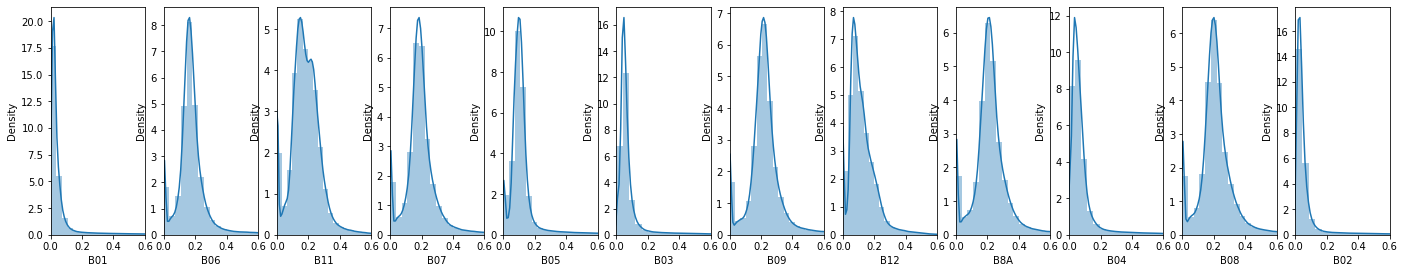

In [ ]:
#Check skewness of Class 2
plot_class_distributions(2,0,0.6)

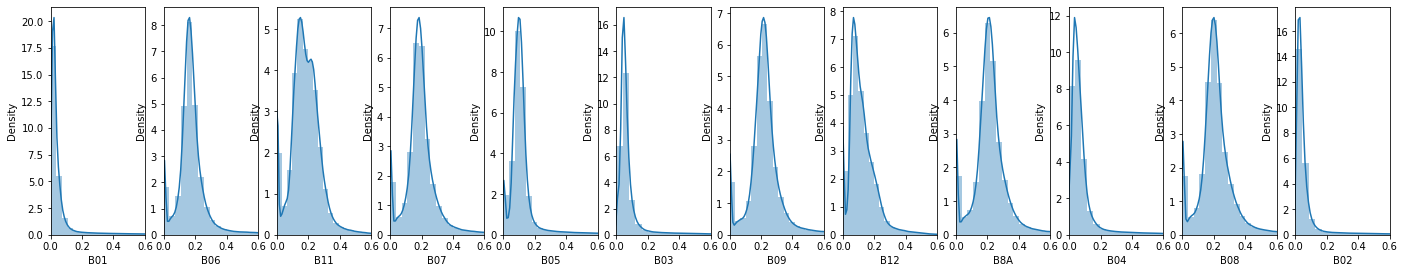

In [ ]:
#Check skewness of Class 5
plot_class_distributions(5,0,0.6)

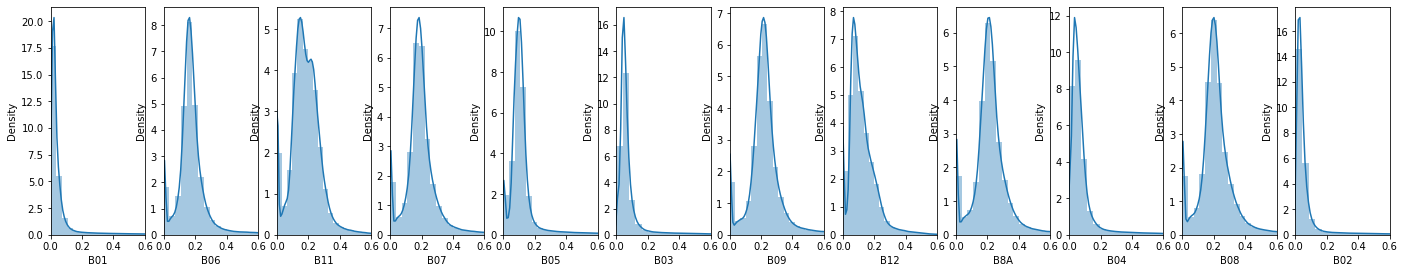

In [ ]:
#Check skewness of Class 6
plot_class_distributions(6,0,0.6)

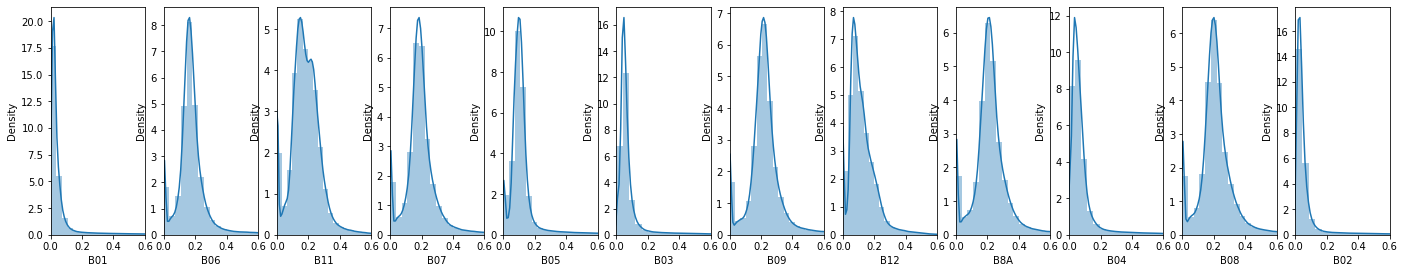

In [ ]:
#Check skewness of Class 8
plot_class_distributions(8,0,0.6)

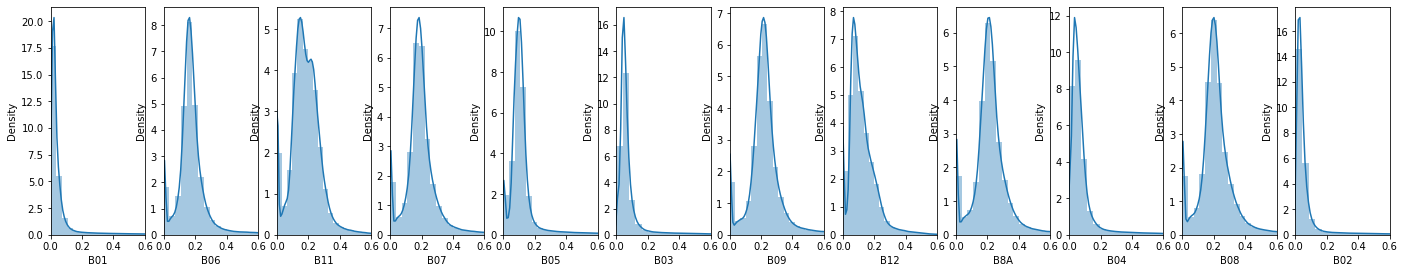

In [ ]:
#Check skewness of Class 10
plot_class_distributions(10,0,0.6)

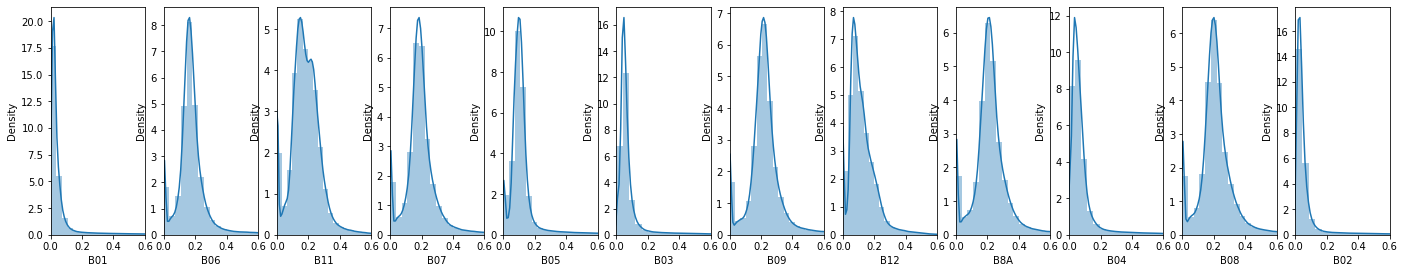

In [ ]:
#Check skewness of Class 11
plot_class_distributions(11,0, 0.6)

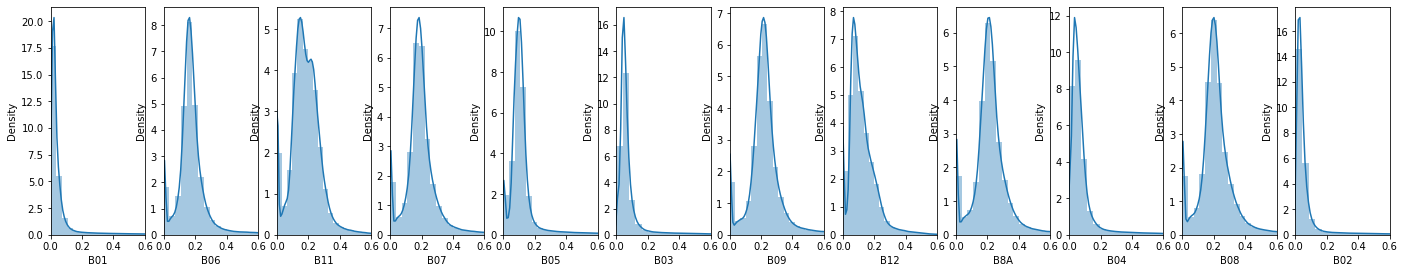

In [ ]:
#Check skewness of Class 12
plot_class_distributions(12,0, 0.6)

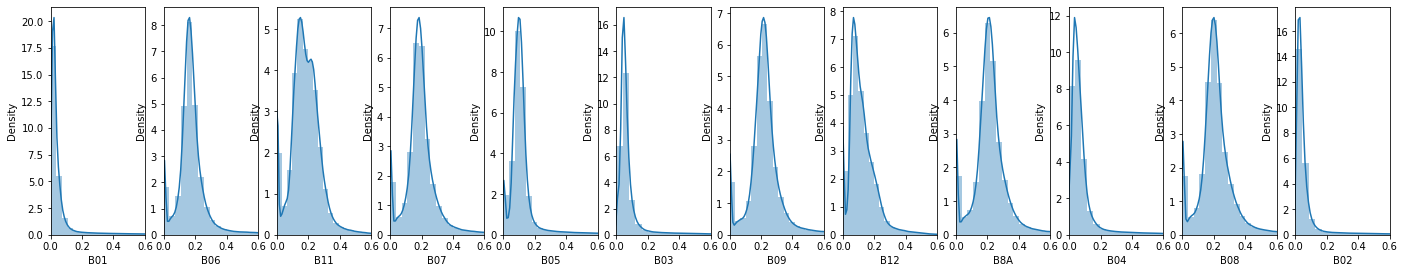

In [ ]:
#Check skewness of Class 13
plot_class_distributions(13,0, 0.6)

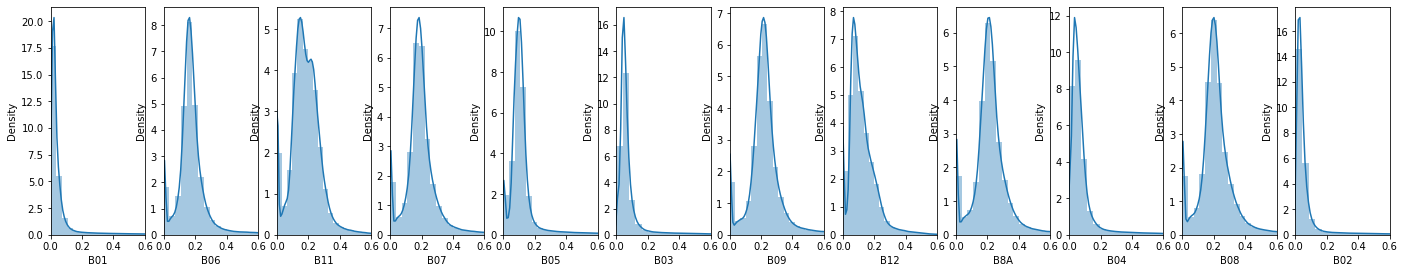

In [ ]:
#Check skewness of Class 14
plot_class_distributions(14,0,0.6)

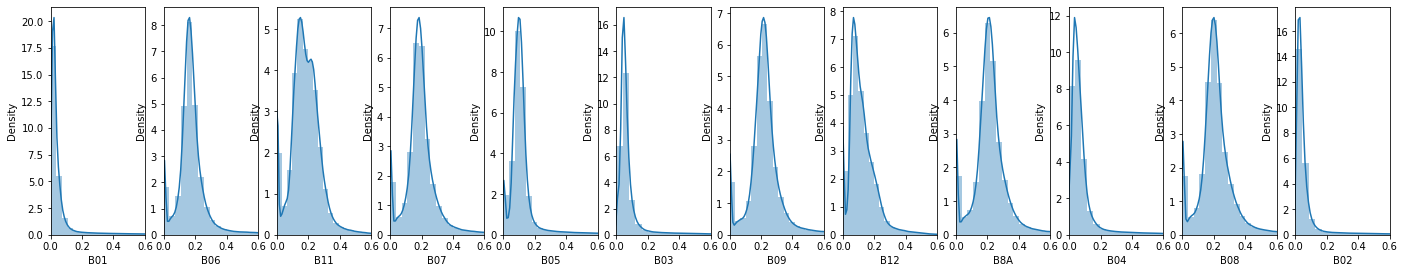

In [ ]:
#Check skewness of Class 15
plot_class_distributions(15,0, 0.6)

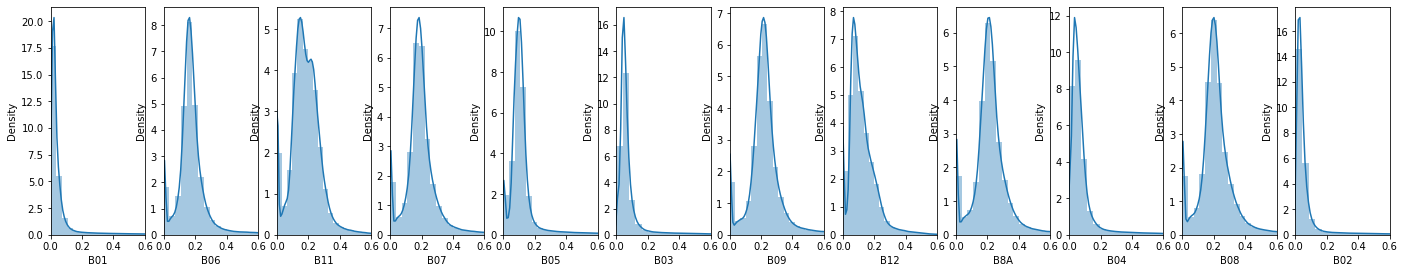

In [ ]:
#Check skewness of Class 16
plot_class_distributions(16,0,0.6)

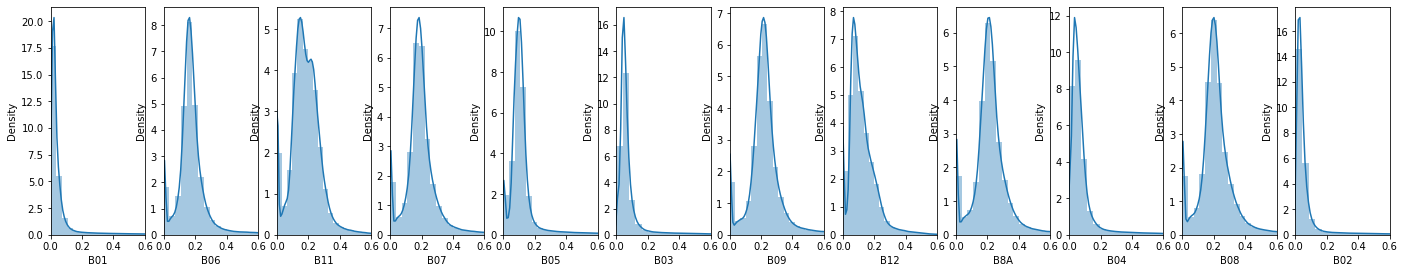

In [ ]:
#Check skewness of Class 17
plot_class_distributions(17,0, 0.6)

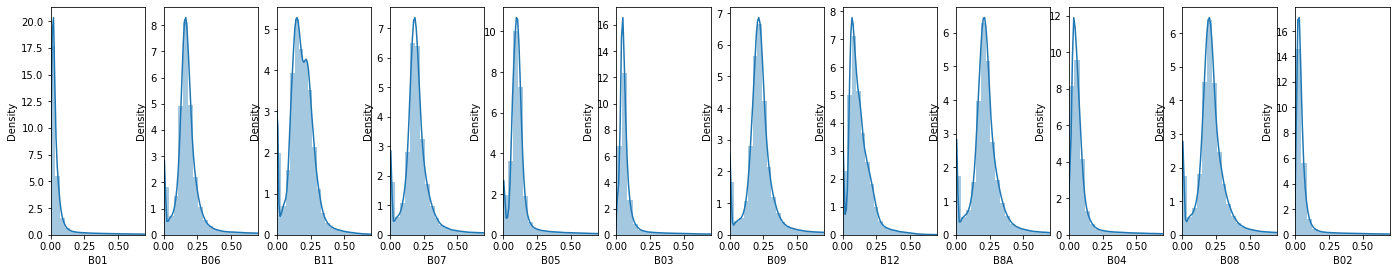

In [ ]:
#Check skewness of Class 18
plot_class_distributions(18,0,0.7)

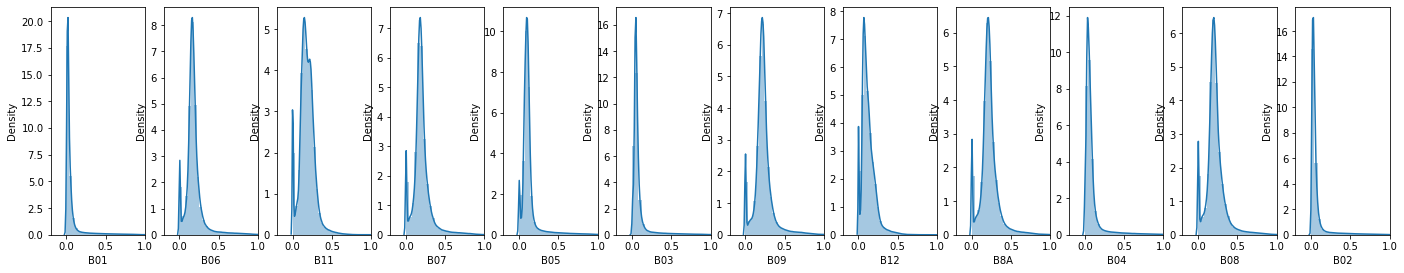

In [ ]:
#Check skewness of Class 19
plot_class_distributions(19,-0.2,1)

# Other EDA

In [11]:
#Check describe
sample.describe()

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
count,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06
mean,6.606933e-02,1.837739e-01,1.830262e-01,2.018963e-01,1.290659e-01,8.906780e-02,2.293340e-01,1.228525e-01,2.230089e-01,9.145991e-02,2.203345e-01,7.228992e-02,1.113333e+01
std,1.317717e-01,1.250960e-01,9.837747e-02,1.227070e-01,1.317779e-01,1.333487e-01,1.269125e-01,8.942052e-02,1.220670e-01,1.349743e-01,1.277583e-01,1.357752e-01,5.512010e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.560000e-02,1.347000e-01,1.270000e-01,1.508000e-01,7.860000e-02,3.920000e-02,1.778000e-01,6.740000e-02,1.705000e-01,3.340000e-02,1.645000e-01,2.000000e-02,6.000000e+00
50%,2.570000e-02,1.667000e-01,1.760000e-01,1.875000e-01,1.030000e-01,5.280000e-02,2.182000e-01,1.036000e-01,2.131000e-01,5.530000e-02,2.061000e-01,3.390000e-02,1.200000e+01
75%,5.150000e-02,2.049000e-01,2.347000e-01,2.315000e-01,1.295000e-01,7.700000e-02,2.622000e-01,1.601000e-01,2.617000e-01,8.820000e-02,2.575000e-01,5.810000e-02,1.600000e+01
max,1.879600e+00,1.814800e+00,1.642500e+00,1.831300e+00,1.807900e+00,1.873100e+00,1.633500e+00,1.631700e+00,1.830200e+00,1.830100e+00,1.821300e+00,1.933700e+00,1.900000e+01


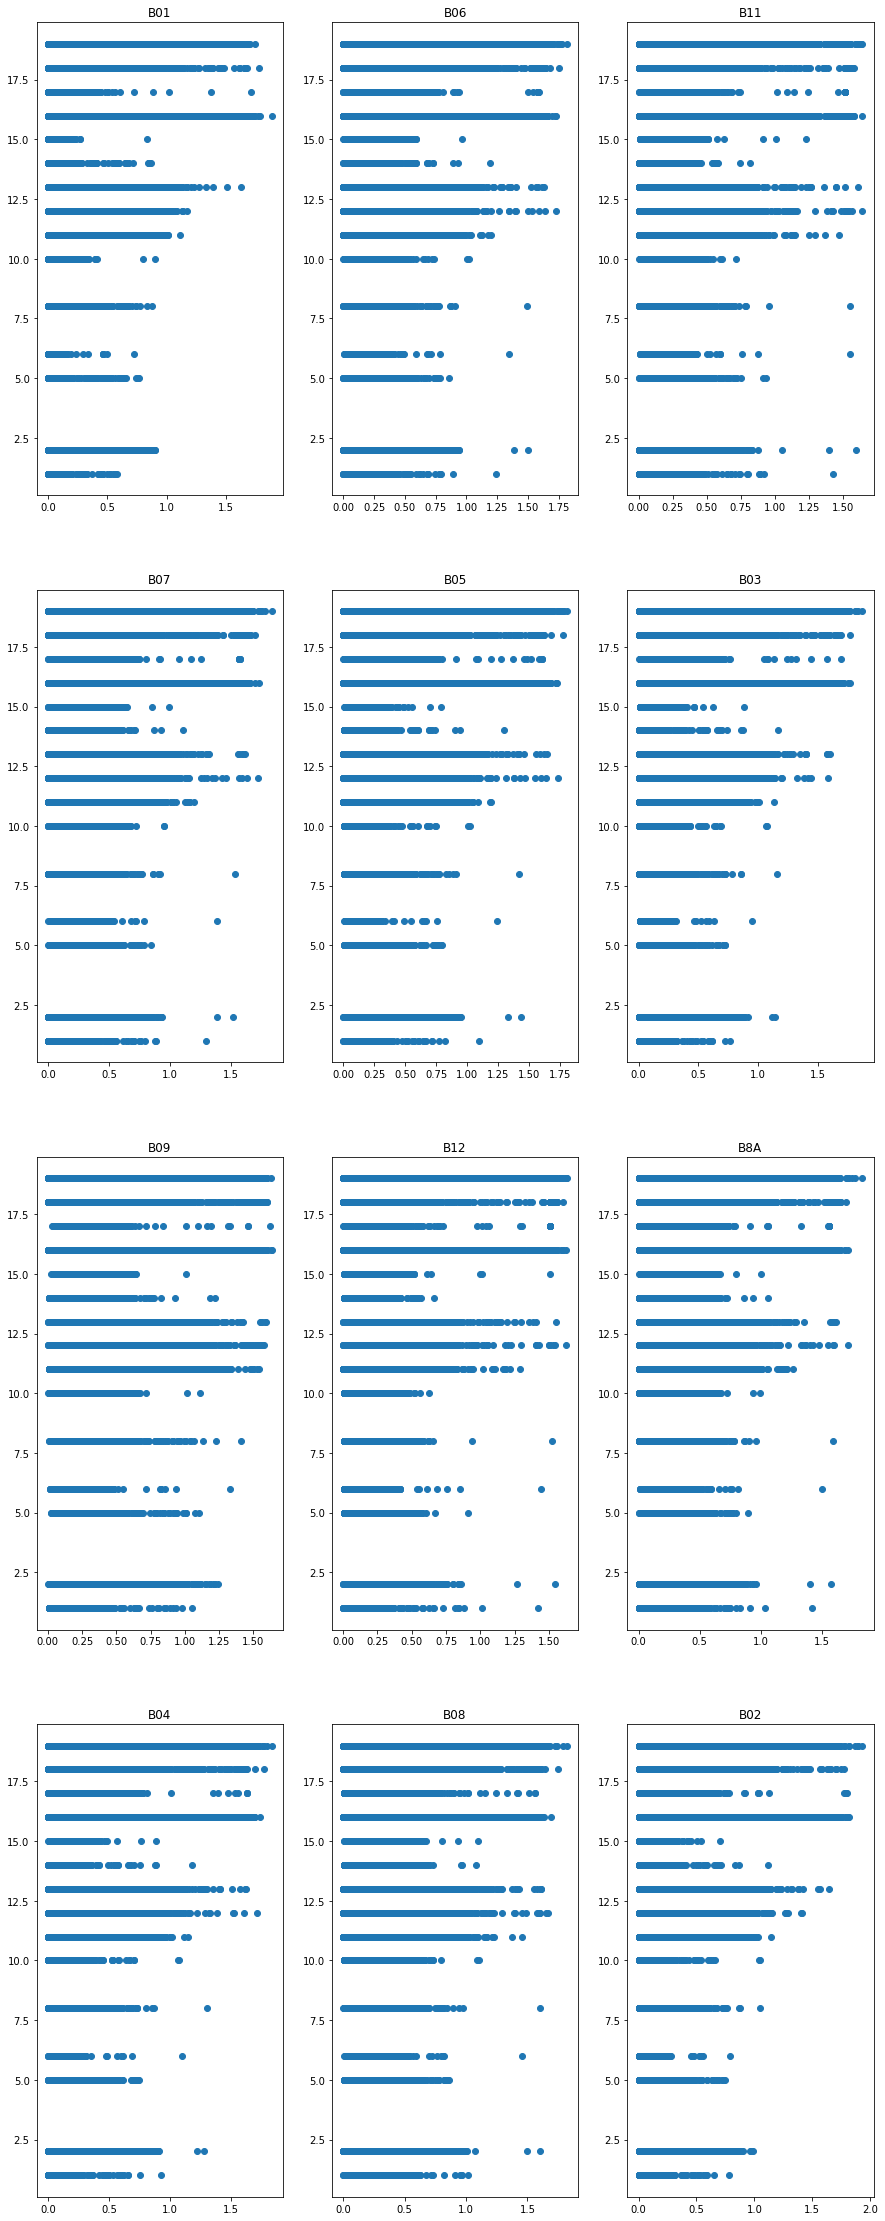

In [12]:
#Visulization of band distribution for each class in the main dataframe

#number of axes = number of possible combos
fig, axes = plt.subplots(4, 3, figsize = (15, 40))

for i, ax in enumerate(axes.flat):
    
    #index of columns
    X_scatter = sample[sample.columns[:-1][i]]
    Y_scatter = sample['Class']
    
    # scatter current combination
    ax.scatter(X_scatter, Y_scatter)
    ax.set_title(sample.columns[i])

## Apply Z Score

In [20]:
z = copy.deepcopy(sample)

y = z.Class

z = z.apply(zscore)
z['Class'] = y

z.head()

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,-0.359047,-0.531304,-0.906811,-0.611105,-0.444225,-0.325911,-0.925071,-0.794002,-0.679201,-0.401818,-0.619320,-0.317395,1
1,-0.381059,-0.353948,-0.476293,-0.304968,-0.426782,-0.412824,-0.260767,-0.549941,-0.265810,-0.442536,-0.332249,-0.386571,1
2,-0.087321,-0.039979,0.524177,-0.119332,0.164765,0.302709,0.025285,0.753209,-0.197867,0.368857,-0.162510,0.263242,1
3,-0.358288,-0.224526,-0.529217,-0.196680,-0.328191,-0.366371,-0.267071,-0.591364,-0.217513,-0.403299,-0.264979,-0.347568,1
4,-0.406865,-0.245297,-0.668652,-0.192610,-0.416165,-0.383604,-0.188269,-0.675330,-0.173309,-0.470668,-0.239948,-0.378476,1


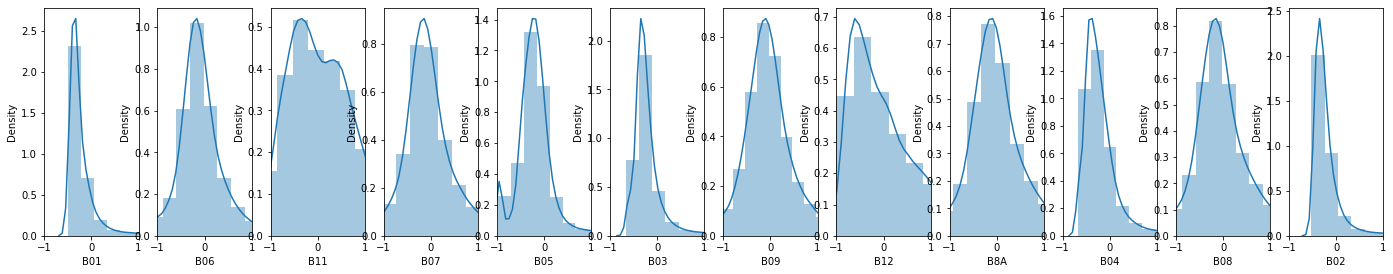

In [17]:
plot_class_distributions(1,-1,1)

In [21]:
#Save zscored data
z.to_csv('/content/drive/MyDrive/AISC/z_scored_data.csv', index = False)

## Apply Log

In [25]:
#Create deepcopy
lg = copy.deepcopy(sample)

#apply log function
for c in lg.columns:
  if lg[c].dtype == 'float64':
    lg[c] = np.log10(lg[c])

#print new dataframe
lg.head()

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,-1.728158,-0.931072,-1.027797,-0.896881,-1.152427,-1.341989,-0.951170,-1.285670,-0.853872,-1.430626,-0.850473,-1.536107,1
1,-1.801343,-0.855737,-0.866142,-0.784098,-1.138466,-1.469800,-0.707301,-1.133122,-0.720105,-1.500313,-0.750068,-1.705534,1
2,-1.263603,-0.747875,-0.630042,-0.727694,-0.821887,-0.888066,-0.633577,-0.721246,-0.701584,-0.850165,-0.700057,-0.966576,1
3,-1.725842,-0.807990,-0.883060,-0.750313,-1.067019,-1.396856,-0.709075,-1.155523,-0.706859,-1.432974,-0.729554,-1.602060,1
4,-1.906578,-0.815309,-0.931072,-0.749092,-1.130182,-1.422508,-0.687400,-1.204815,-0.695079,-1.555955,-0.722162,-1.681937,1


In [26]:
#Save zscored data
lg.to_csv('/content/drive/MyDrive/AISC/log_data.csv', index = False)

## Fix outliers

In [ ]:
def outlier_fix(dataframe):
    
    new_frame = pd.DataFrame()
    
    for column in dataframe.columns:
        
        #make sure we don't transform y column
        if column != 'y':
            #create deepcopy to change
            temp_band = deepcopy(dataframe.loc[:,column].values)
            outlier = np.quantile(temp_band, q = 0.75) * 2
              
            #replace any above outlier with mean    
            temp_band[temp_band > outlier] = np.mean(temp_band)
            new_frame[column] = temp_band
    #if dataframe has a y column add back in    
    try:
        new_frame['y'] = dataframe['y']
        return new_frame
    #if not (ex: its X dataframe) just return frame
    except:
        return new_frame
#to just add a new column of transformed
dataframe['B01f'] = outlier_fix(dataframe)['B01']

In [ ]:
#Create deepcopy
out = copy.deepcopy(sample)

#Subsample and Save final csv

In [ ]:
#SubSample ~25 000 for each class
sample = merged_data.groupby('Class').apply(lambda x: x.sample(n=50000)).reset_index(drop=True)
sample.head(4)